## Market Segmentation

Using the McDonald's dataset from [Market Segmentation Analysis](http://www.marketsegmentationanalysis.org/).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('assets/mcdonalds.csv')
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
df.isnull().any()

yummy             False
convenient        False
spicy             False
fattening         False
greasy            False
fast              False
cheap             False
tasty             False
expensive         False
healthy           False
disgusting        False
Like              False
Age               False
VisitFrequency    False
Gender            False
dtype: bool

__Conclusion__: A clean dataset with evenly distributed features.

In [5]:
sns.set_style('darkgrid')

### Step 1: Deciding to Segment
McDonald's can take the position that it caters to the entire market and that there is no need to understand systematic differences across market segments. Alternatively, McDonald's can take the position that, despite their market power, there is value in investigating systematic heterogeneity among consumers and harvest these differences using a differentiated marketing strategy.

### Step 2: Ideal Target Segment

The likelihood of eating at McDonald's and the frequency of eating there would be best target segment.

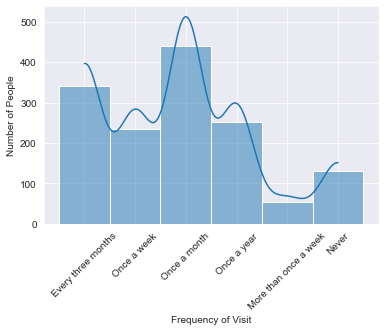

In [6]:
sns.histplot(df, x="VisitFrequency", kde=True)
plt.xlabel("Frequency of Visit")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.show()

- Majority of demographic surveyed have regular interest in McDonalds.
- Very few people consume visit more than once within a month.

### Step 3: Data Identification

The data set contains responses from 1453 adult Australian consumers relating to
their perceptions of McDonald's with respect to the following attributes: YUMMY,
CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE,
HEALTHY, and DISGUSTING. These attributes emerged from a qualitative study conducted in preparation of the survey study. For each of those attributes, respondents provided either a YES response (indicating that they feel McDonald's possesses this attribute), or a NO response (indicating that McDonald's does not possess this attribute).

In addition, respondents indicated their AGE and GENDER. Had this data been
collected for a real market segmentation study, additional information - such as
details about their dining out behaviour, and their use of information channels -
would have been collected to enable the development of a richer and more detailed
description of each market segment.

### Step 4: Exploring and Cleaning Data

In [7]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [8]:
df.yummy.value_counts()

Yes    803
No     650
Name: yummy, dtype: int64

Replacing `Yes` with `1` and `No` with `0`.

In [9]:
df.replace(['Yes','No'],[1,0],inplace=True)
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


Changing datatype in Like

In [10]:
df.Like.value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

Normalizing Likeness by transforming from [-5, +5] to [0, 10].

In [11]:
df.Like = df.Like.replace(['I hate it!-5','I love it!+5'],['-5','+5']).astype('int64') + 5
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,2,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,7,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,6,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,9,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,7,49,Once a month,Male


__Principal Components Analysis__

Creating PCA which can further be used to create a perceptual map.

In [12]:
from sklearn.decomposition import PCA

pca = PCA()
# Excluding Non Binary elements
transformed_data = pca.fit_transform(df.iloc[:, :-4])

In [13]:
pca.explained_variance_ratio_.cumsum()

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [14]:
comps = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(11)], index=df.columns[:-4])
comps

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


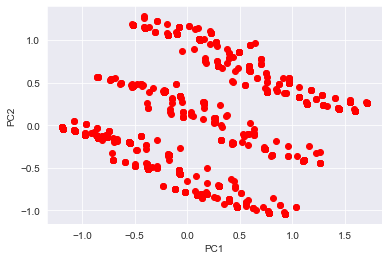

In [15]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], color='r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Step 5: _k_-Means Cluster

First, using `Age` and `Like`.

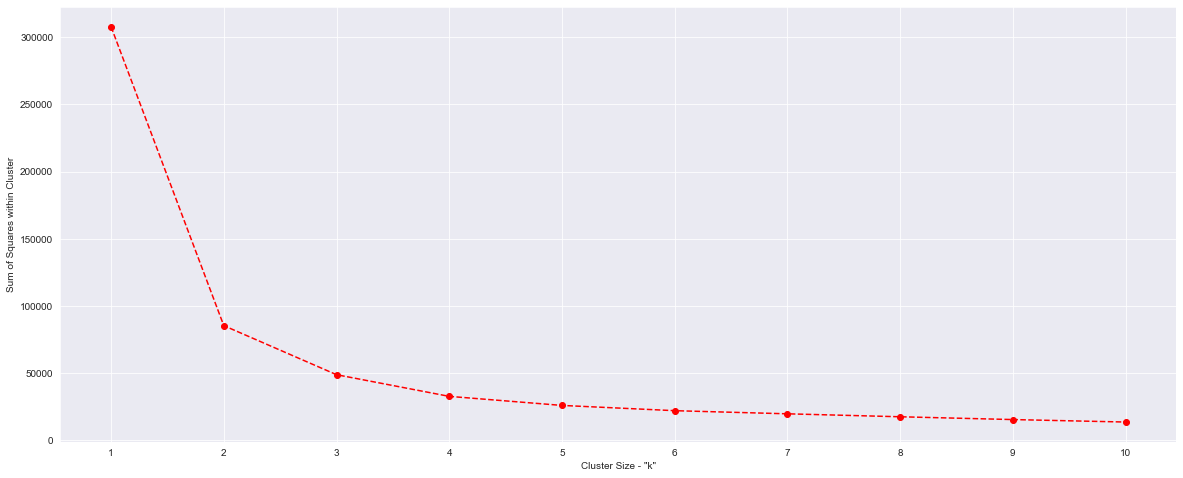

In [18]:
from sklearn.cluster import KMeans

X1 = df[['Age', 'Like']].values
wcss = []

# Using Cluster sizes from 1 - 10
for k in range(10):
    kmeans = KMeans(k+1, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(20, 8))
plt.plot(np.arange(10) + 1, wcss, 'r--o')
plt.xlabel('Cluster Size - "k"')
plt.xticks(np.arange(10) + 1)
plt.ylabel("Sum of Squares within Cluster")
plt.show()

Choosing `k` as `4`

In [19]:
kmeans = KMeans(4)
labels = kmeans.fit_predict(X1)
labels

array([2, 1, 2, ..., 1, 3, 0])

In [20]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[25.13109756,  7.14329268],
       [50.89182058,  5.16886544],
       [62.35309973,  4.91644205],
       [37.72533333,  6.048     ]])

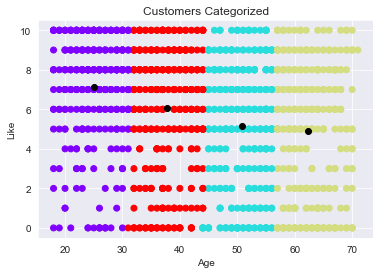

In [22]:
plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap="rainbow")
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],color="black")
plt.title("Customers Categorized")
plt.xlabel("Age")
plt.ylabel("Like")
plt.show()